In [1]:
import os, shutil
import random
import pandas as pd
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from sklearn.model_selection import train_test_split

In [2]:
original_data_dir = "/Users/kimhyunmin/animal_images"

In [3]:
df = pd.read_csv("/Users/kimhyunmin/animal_data_img.csv")

In [4]:
df.head()

,Label,Animal_Type,Image_File
0,indian ringneck,Bird,animal_images/1633802583762_Indian Ringneck fo...
1,rottweiler puppy,Dog,animal_images/1633802583996_Rottweiler Puppy f...
2,rabbit,Rabbit,animal_images/1633802584211_Rabbit for sale.jpg
3,cokatail bird,Bird,animal_images/1633802584412_Cokatail bird for ...
4,apple konda pigeon,Bird,animal_images/1633802584634_Apple Konda Pigeon...


In [5]:
labels = df.sort_values("Animal_Type")

class_names = list(labels.Animal_Type.unique())

In [ ]:
#make categories

In [190]:
for i in class_names:
    img_dir = os.makedirs(os.path.join('train_', i))

In [ ]:
#move images

In [191]:
for c in class_names:
    for i in list(labels[labels['Animal_Type']==c]["Image_File"]): # Image Id
        get_image = os.path.join(original_data_dir, i)
        move_image_to_cat = shutil.copy(get_image, '/Users/kimhyunmin/train_/' + c)         

In [192]:
class_names = ['Bird', 'Cat', 'Dog', 'Fish', 'Guinea pig', 'Other', 'Rabbit']

In [209]:
bl = len(df[df["Animal_Type"] == "Bird"])
dl = len(df[df["Animal_Type"] == "Dog"])
rl = len(df[df["Animal_Type"] == "Rabbit"])
fl = len(df[df["Animal_Type"] == "Fish"])
cl = len(df[df["Animal_Type"] == "Cat"])
gl = len(df[df["Animal_Type"] == "Guinea pig / mouse"])
ol = len(df[df["Animal_Type"] == "Other"])

In [ ]:
#make each train, validation, test set

In [199]:
btrain = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Bird", 'train'), exist_ok=True)
bval = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Bird", 'validation'), exist_ok=True)
btest = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Bird", 'test'), exist_ok=True)

ctrain = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Cat", 'train'), exist_ok=True)
cval = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Cat", 'validation'), exist_ok=True)
ctest = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Cat", 'test'), exist_ok=True)

dtrain = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Dog", 'train'), exist_ok=True)
dval = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Dog", 'validation'), exist_ok=True)
dtest = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Dog", 'test'), exist_ok=True)

ftrain = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Fish", 'train'), exist_ok=True)
fval = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Fish", 'validation'), exist_ok=True)
ftest = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Fish", 'test'), exist_ok=True)

gtrain = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Guinea pig", 'train'), exist_ok=True)
gval = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Guinea pig", 'validation'), exist_ok=True)
gtest = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Guinea pig", 'test'), exist_ok=True)

otrain = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Other", 'train'), exist_ok=True)
oval = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Other", 'validation'), exist_ok=True)
otest = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Other", 'test'), exist_ok=True)

rtrain = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Rabbit", 'train'), exist_ok=True)
rval = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Rabbit", 'validation'), exist_ok=True)
rtest = os.makedirs(os.path.join("/Users/kimhyunmin/train_/Rabbit", 'test'), exist_ok=True)

In [ ]:
def batch_move_files(file_list, source_path, destination_path):
    for file in file_list:
        image = file.split('/')[-1] + '.jpg'
        shutil.copy(os.path.join(source_path, image), destination_path)
    return

In [ ]:
#classification bird

In [200]:
image_files1 = glob("/Users/kimhyunmin/train_/Bird/*.jpg")
images1 = [name.replace(".jpg","") for name in image_files1]

train_names, test_names = train_test_split(images1, test_size=0.2,
                                          random_state=42, shuffle=True)
val_names, test_names = train_test_split(test_names, test_size=0.5,
                                        random_state=42, shuffle=True)


source_dir1 = "/Users/kimhyunmin/train_/Bird/"
train_dir1 = "/Users/kimhyunmin/train_/Bird/train"
val_dir1 = "/Users/kimhyunmin/train_/Bird/validation"
test_dir1 = "/Users/kimhyunmin/train_/Bird/test"
batch_move_files(train_names, source_dir1, train_dir1)
batch_move_files(val_names, source_dir1, val_dir1)
batch_move_files(test_names, source_dir1, test_dir1)

In [ ]:
#classification cat

In [201]:
image_files2 = glob("/Users/kimhyunmin/train_/Cat/*.jpg")
images2 = [name.replace(".jpg","") for name in image_files2]

train_names, test_names = train_test_split(images2, test_size=0.2,
                                          random_state=42, shuffle=True)
val_names, test_names = train_test_split(test_names, test_size=0.5,
                                        random_state=42, shuffle=True)

source_dir2 = "/Users/kimhyunmin/train_/Cat/"
train_dir2 = "/Users/kimhyunmin/train_/Cat/train"
val_dir2 = "/Users/kimhyunmin/train_/Cat/validation"
test_dir2 = "/Users/kimhyunmin/train_/Cat/test"
batch_move_files(train_names, source_dir2, train_dir2)
batch_move_files(val_names, source_dir2, val_dir2)
batch_move_files(test_names, source_dir2, test_dir2)

In [ ]:
#classification dog

In [202]:
image_files3 = glob("/Users/kimhyunmin/train_/Dog/*.jpg")
images3 = [name.replace(".jpg","") for name in image_files3]

train_names, test_names = train_test_split(images3, test_size=0.2,
                                          random_state=42, shuffle=True)
val_names, test_names = train_test_split(test_names, test_size=0.5,
                                        random_state=42, shuffle=True)

source_dir3 = "/Users/kimhyunmin/train_/Dog/"
train_dir3 = "/Users/kimhyunmin/train_/Dog/train"
val_dir3 = "/Users/kimhyunmin/train_/Dog/validation"
test_dir3 = "/Users/kimhyunmin/train_/Dog/test"
batch_move_files(train_names, source_dir3, train_dir3)
batch_move_files(val_names, source_dir3, val_dir3)
batch_move_files(test_names, source_dir3, test_dir3)

In [ ]:
#classification fish

In [203]:
image_files4 = glob("/Users/kimhyunmin/train_/Fish/*.jpg")
images4 = [name.replace(".jpg","") for name in image_files4]

train_names, test_names = train_test_split(images4, test_size=0.2,
                                          random_state=42, shuffle=True)
val_names, test_names = train_test_split(test_names, test_size=0.5,
                                        random_state=42, shuffle=True)

source_dir4 = "/Users/kimhyunmin/train_/Fish/"
train_dir4 = "/Users/kimhyunmin/train_/Fish/train"
val_dir4 = "/Users/kimhyunmin/train_/Fish/validation"
test_dir4 = "/Users/kimhyunmin/train_/Fish/test"
batch_move_files(train_names, source_dir4, train_dir4)
batch_move_files(val_names, source_dir4, val_dir4)
batch_move_files(test_names, source_dir4, test_dir4)

In [ ]:
#classification Guinea pig

In [204]:
image_files5 = glob("/Users/kimhyunmin/train_/Guinea pig/*.jpg")
images5 = [name.replace(".jpg","") for name in image_files5]

train_names, test_names = train_test_split(images5, test_size=0.2,
                                          random_state=42, shuffle=True)
val_names, test_names = train_test_split(test_names, test_size=0.5,
                                        random_state=42, shuffle=True)

source_dir5 = "/Users/kimhyunmin/train_/Guinea pig/"
train_dir5 = "/Users/kimhyunmin/train_/Guinea pig/train"
val_dir5 = "/Users/kimhyunmin/train_/Guinea pig/validation"
test_dir5 = "/Users/kimhyunmin/train_/Guinea pig/test"
batch_move_files(train_names, source_dir5, train_dir5)
batch_move_files(val_names, source_dir5, val_dir5)
batch_move_files(test_names, source_dir5, test_dir5)

In [ ]:
#classification Other

In [205]:
image_files6 = glob("/Users/kimhyunmin/train_/Other/*.jpg")
images6 = [name.replace(".jpg","") for name in image_files6]

train_names, test_names = train_test_split(images6, test_size=0.2,
                                          random_state=42, shuffle=True)
val_names, test_names = train_test_split(test_names, test_size=0.5,
                                        random_state=42, shuffle=True)

source_dir6 = "/Users/kimhyunmin/train_/Other/"
train_dir6 = "/Users/kimhyunmin/train_/Other/train"
val_dir6 = "/Users/kimhyunmin/train_/Other/validation"
test_dir6 = "/Users/kimhyunmin/train_/Other/test"
batch_move_files(train_names, source_dir6, train_dir6)
batch_move_files(val_names, source_dir6, val_dir6)
batch_move_files(test_names, source_dir6, test_dir6)

In [ ]:
#classification Rabbit

In [206]:
image_files7 = glob("/Users/kimhyunmin/train_/Rabbit/*.jpg")
images7 = [name.replace(".jpg","") for name in image_files7]

train_names, test_names = train_test_split(images7, test_size=0.2,
                                          random_state=42, shuffle=True)
val_names, test_names = train_test_split(test_names, test_size=0.5,
                                        random_state=42, shuffle=True)

source_dir7 = "/Users/kimhyunmin/train_/Rabbit/"
train_dir7 = "/Users/kimhyunmin/train_/Rabbit/train"
val_dir7 = "/Users/kimhyunmin/train_/Rabbit/validation"
test_dir7 = "/Users/kimhyunmin/train_/Rabbit/test"
batch_move_files(train_names, source_dir7, train_dir7)
batch_move_files(val_names, source_dir7, val_dir7)
batch_move_files(test_names, source_dir7, test_dir7)

In [ ]:
#make train, validation, test set

In [234]:
base_dir = "/Users/kimhyunmin/data"

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

train_dir = os.mkdir(os.path.join(base_dir, 'train'))
validation_dir = os.mkdir(os.path.join(base_dir, 'validation'))
test_dir = os.mkdir(os.path.join(base_dir, 'test'))

In [251]:
for i in class_names:
    os.makedirs(os.path.join("/Users/kimhyunmin/data/train", i))
    os.makedirs(os.path.join("/Users/kimhyunmin/data/validation", i))
    os.makedirs(os.path.join("/Users/kimhyunmin/data/test", i))

In [ ]:
#train set

In [252]:
path1 = "/Users/kimhyunmin/train_/", c, 'train'
for c in class_names: 
    path1 = os.path.join( '/Users/kimhyunmin/train_/' , c, 'train')
    for fname in os.listdir(path1):
        src = os.path.join('/Users/kimhyunmin/train_/' , c, 'train', fname)
        dst = os.path.join("/Users/kimhyunmin/data/train/", c, fname) 
        shutil.copy(src, dst)
        

In [ ]:
#validation set

In [253]:
path2 = "/Users/kimhyunmin/train_/", c, 'validation'
for c in class_names:
    path2 = os.path.join( '/Users/kimhyunmin/train_/' , c, 'validation')
    for fname in os.listdir(path2):
        src = os.path.join('/Users/kimhyunmin/train_/' , c, 'validation', fname) 
        dst = os.path.join("/Users/kimhyunmin/data/validation/", c, fname) 
        shutil.copy(src, dst)

In [ ]:
#test set

In [254]:
path3 = "/Users/kimhyunmin/train_", c, 'test'
for c in class_names: 
    path3 = os.path.join( '/Users/kimhyunmin/train_/' , c, 'test')
    for fname in os.listdir(path3):
        src = os.path.join('/Users/kimhyunmin/train_/' , c, 'test', fname) 
        dst = os.path.join("/Users/kimhyunmin/data/test/", c, fname) 
        shutil.copy(src, dst)

Modeling

In [6]:
train_dir = "/Users/kimhyunmin/data/train"
validation_dir = "/Users/kimhyunmin/data/validation"
test_dir = "/Users/kimhyunmin/data/test"

In [7]:
b_train = "/Users/kimhyunmin/data/train/Bird"
b_val = "/Users/kimhyunmin/data/validation/Bird"
b_test = "/Users/kimhyunmin/data/test/Bird"

c_train = "/Users/kimhyunmin/data/train/Cat"
c_val = "/Users/kimhyunmin/data/validation/Cat"
c_test = "/Users/kimhyunmin/data/test/Cat"

d_train = "/Users/kimhyunmin/data/train/Dog"
d_val = "/Users/kimhyunmin/data/validation/Dog"
d_test = "/Users/kimhyunmin/data/test/Dog"

f_train = "/Users/kimhyunmin/data/train/Fish"
f_val = "/Users/kimhyunmin/data/validation/Fish"
f_test = "/Users/kimhyunmin/data/test/Fish"

g_train = "/Users/kimhyunmin/data/train/Guinea pig"
g_val = "/Users/kimhyunmin/data/validation/Guinea pig"
g_test = "/Users/kimhyunmin/data/test/Guinea pig"

o_train = "/Users/kimhyunmin/data/train/Other"
o_val = "/Users/kimhyunmin/data/validation/Other"
o_test = "/Users/kimhyunmin/data/test/Other"

r_train = "/Users/kimhyunmin/data/train/Rabbit"
r_val = "/Users/kimhyunmin/data/validation/Rabbit"
r_test = "/Users/kimhyunmin/data/test/Rabbit"

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 0~1 사이값으로 픽셀값을 변환
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir, # 폴더명
    target_size=(150,150), # 이미지 크기를 동일한 크기로 변환
    batch_size=20, # 한 번에 전처리할 이미지의 수
    class_mode="categorical")

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

Found 9564 images belonging to 7 classes.
Found 1196 images belonging to 7 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

Found 1199 images belonging to 7 classes.


In [10]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'Bird': 0, 'Cat': 1, 'Dog': 2, 'Fish': 3, 'Guinea pig': 4, 'Other': 5, 'Rabbit': 6}
{'Bird': 0, 'Cat': 1, 'Dog': 2, 'Fish': 3, 'Guinea pig': 4, 'Other': 5, 'Rabbit': 6}


CNN모델1

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))  #same: 필터의 사이즈가 k이면 사방으로 k/2 만큼의 패딩을 준다.
model1.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(units=512, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(units=7, activation="softmax"))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       2

In [12]:
model1.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["acc"])

In [13]:
history1 = model1.fit_generator(generator=train_generator, epochs=20, validation_data=validation_generator)

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
479/479 [==============================] - 160s 332ms/step - loss: 1.2388 - acc: 0.5128 - val_loss: 1.1604 - val_acc: 0.5727
Epoch 2/20
479/479 [==============================] - 160s 334ms/step - loss: 1.0594 - acc: 0.6268 - val_loss: 0.9810 - val_acc: 0.6798
Epoch 3/20
479/479 [==============================] - 160s 334ms/step - loss: 0.9432 - acc: 0.6712 - val_loss: 0.9353 - val_acc: 0.6630
Epoch 4/20
479/479 [==============================] - 153s 318ms/step - loss: 0.8564 - acc: 0.7040 - val_loss: 0.8525 - val_acc: 0.7065
Epoch 5/20
479/479 [==============================] - 152s 318ms/step - loss: 0.7337 - acc: 0.7411 - val_loss: 0.8714 - val_acc: 0.6973
Epoch 6/20
479/479 [==============================] - 161s 336ms/step - loss: 0.6089 - acc: 0.7840 - val_loss: 0.8442 - val_acc: 0.7207
Epoch 7/20
479/479 [==============================] - 158s 330ms/step - loss: 0.4579 - acc: 0.8344 - val_loss: 0.9015 - val_acc: 0.7308
Epoch 8/20
479/479 [============================

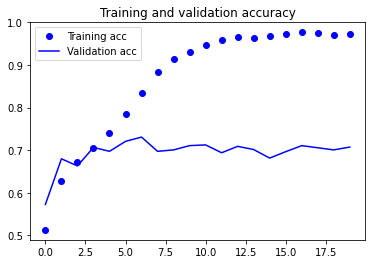

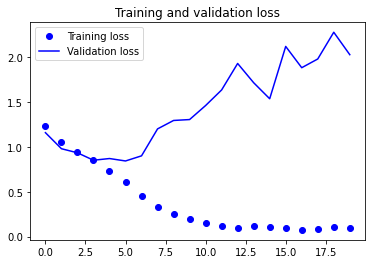

In [16]:
import matplotlib.pyplot as plt
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
test_loss,test_acc=model1.evaluate_generator(test_generator,steps=50)
test_loss,test_acc

(2.3301217555999756, 0.7089999914169312)

CNN모델2

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model2 = Sequential()

model2.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2))) 
model2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(units=128, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(units=7, activation="softmax"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 128)      

In [19]:
model2.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["acc"])

In [20]:
history2 = model2.fit_generator(generator=train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
479/479 [==============================] - 75s 156ms/step - loss: 1.3342 - acc: 0.4512 - val_loss: 1.1579 - val_acc: 0.5987
Epoch 2/20
479/479 [==============================] - 76s 159ms/step - loss: 1.1443 - acc: 0.5818 - val_loss: 1.0896 - val_acc: 0.6012
Epoch 3/20
479/479 [==============================] - 76s 158ms/step - loss: 1.0609 - acc: 0.6339 - val_loss: 0.9572 - val_acc: 0.6714
Epoch 4/20
479/479 [==============================] - 76s 158ms/step - loss: 0.9704 - acc: 0.6733 - val_loss: 0.8942 - val_acc: 0.6973
Epoch 5/20
479/479 [==============================] - 76s 158ms/step - loss: 0.9149 - acc: 0.6841 - val_loss: 0.8623 - val_acc: 0.7182
Epoch 6/20
479/479 [==============================] - 76s 160ms/step - loss: 0.8215 - acc: 0.7158 - val_loss: 0.8327 - val_acc: 0.7182
Epoch 7/20
479/479 [==============================] - 76s 159ms/step - loss: 0.7445 - acc: 0.7435 - val_loss: 0.8266 - val_acc: 0.7316
Epoch 8/20
479/479 [==============================] - 7

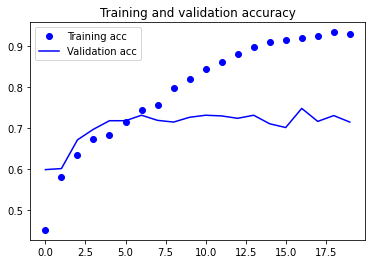

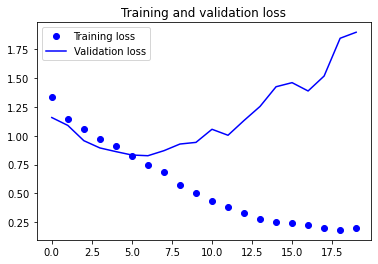

In [21]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
test_loss,test_acc=model2.evaluate_generator(test_generator,steps=50)
test_loss, test_acc

(1.7980824708938599, 0.7260000109672546)

CNN모델3

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2))) 
model3.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(units=256, activation="relu"))
model3.add(Dropout(0.3))
model3.add(Dense(units=7, activation="softmax"))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)            

In [24]:
model3.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["acc"])

In [25]:
history3 = model3.fit_generator(generator=train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
479/479 [==============================] - 129s 268ms/step - loss: 1.2304 - acc: 0.5308 - val_loss: 1.1821 - val_acc: 0.5686
Epoch 2/20
479/479 [==============================] - 130s 271ms/step - loss: 1.0121 - acc: 0.6442 - val_loss: 0.9427 - val_acc: 0.6747
Epoch 3/20
479/479 [==============================] - 129s 270ms/step - loss: 0.8885 - acc: 0.6882 - val_loss: 0.8877 - val_acc: 0.6948
Epoch 4/20
479/479 [==============================] - 130s 271ms/step - loss: 0.7374 - acc: 0.7368 - val_loss: 0.9094 - val_acc: 0.6973
Epoch 5/20
479/479 [==============================] - 136s 283ms/step - loss: 0.5644 - acc: 0.8006 - val_loss: 0.9326 - val_acc: 0.6873
Epoch 6/20
479/479 [==============================] - 131s 273ms/step - loss: 0.3702 - acc: 0.8692 - val_loss: 1.0924 - val_acc: 0.7149
Epoch 7/20
479/479 [==============================] - 131s 273ms/step - loss: 0.2184 - acc: 0.9271 - val_loss: 1.2782 - val_acc: 0.7065
Epoch 8/20
479/479 [============================

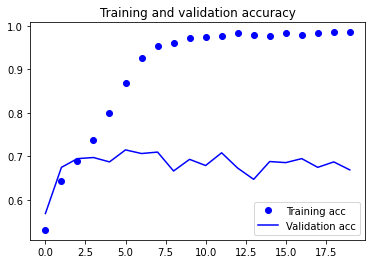

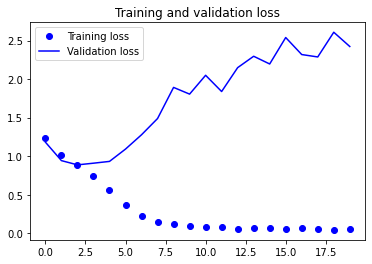

In [26]:
import matplotlib.pyplot as plt
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
test_loss,test_acc=model3.evaluate_generator(test_generator,steps=50)
test_loss, test_acc

(2.6451358795166016, 0.6650000214576721)

In [ ]:
CNN모델4

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model4 = Sequential()

model4.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model4.add(MaxPooling2D(pool_size=(2, 2))) 
model4.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model4.add(MaxPooling2D(pool_size=(2, 2)))


model4.add(Flatten())
model4.add(Dense(units=512, activation="relu"))
model4.add(Dropout(0.5))
model4.add(Dense(units=7, activation="softmax"))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 37, 256)       295168    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 18, 18, 256)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 82944)            

In [29]:
model4.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["acc"])

In [30]:
history4 = model4.fit_generator(generator=train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
479/479 [==============================] - 369s 770ms/step - loss: 1.2826 - acc: 0.5150 - val_loss: 1.0950 - val_acc: 0.6154
Epoch 2/10
479/479 [==============================] - 371s 775ms/step - loss: 1.0671 - acc: 0.6264 - val_loss: 1.0005 - val_acc: 0.6714
Epoch 3/10
479/479 [==============================] - 369s 769ms/step - loss: 0.9348 - acc: 0.6747 - val_loss: 0.9640 - val_acc: 0.6898
Epoch 4/10
479/479 [==============================] - 373s 779ms/step - loss: 0.8039 - acc: 0.7164 - val_loss: 0.9362 - val_acc: 0.6931
Epoch 5/10
479/479 [==============================] - 366s 764ms/step - loss: 0.6264 - acc: 0.7781 - val_loss: 0.8921 - val_acc: 0.7199
Epoch 6/10
479/479 [==============================] - 368s 769ms/step - loss: 0.4231 - acc: 0.8551 - val_loss: 0.9456 - val_acc: 0.7174
Epoch 7/10
479/479 [==============================] - 371s 774ms/step - loss: 0.2753 - acc: 0.9058 - val_loss: 1.1541 - val_acc: 0.7199
Epoch 8/10
479/479 [============================

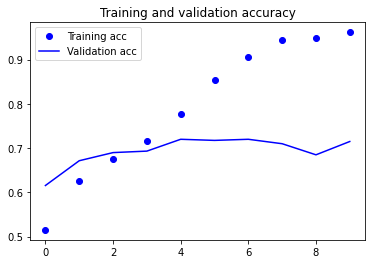

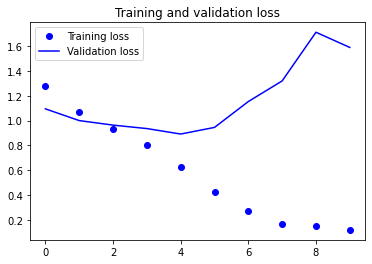

In [32]:
import matplotlib.pyplot as plt
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
test_loss,test_acc=model4.evaluate_generator(test_generator,steps=50)
test_loss, test_acc

(1.601718783378601, 0.7129999995231628)

In [ ]:
CNN모델5

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model5 = Sequential()

model5.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model5.add(MaxPooling2D(pool_size=(2, 2))) 
model5.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())
model5.add(Dense(units=128, activation="relu"))
model5.add(Dropout(0.3))
model5.add(Dense(units=7, activation="softmax"))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 20736)            

In [35]:
model5.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["acc"])

In [36]:
history5 = model5.fit_generator(generator=train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
479/479 [==============================] - 70s 146ms/step - loss: 1.2304 - acc: 0.5404 - val_loss: 1.0137 - val_acc: 0.6647
Epoch 2/10
479/479 [==============================] - 71s 148ms/step - loss: 1.0221 - acc: 0.6470 - val_loss: 0.9287 - val_acc: 0.6890
Epoch 3/10
479/479 [==============================] - 69s 144ms/step - loss: 0.9314 - acc: 0.6820 - val_loss: 0.9445 - val_acc: 0.6714
Epoch 4/10
479/479 [==============================] - 70s 145ms/step - loss: 0.8385 - acc: 0.7056 - val_loss: 0.8731 - val_acc: 0.6965
Epoch 5/10
479/479 [==============================] - 70s 146ms/step - loss: 0.7077 - acc: 0.7495 - val_loss: 0.9125 - val_acc: 0.6982
Epoch 6/10
479/479 [==============================] - 71s 148ms/step - loss: 0.5984 - acc: 0.7900 - val_loss: 0.9757 - val_acc: 0.6764
Epoch 7/10
479/479 [==============================] - 69s 144ms/step - loss: 0.4496 - acc: 0.8392 - val_loss: 0.9560 - val_acc: 0.7199
Epoch 8/10
479/479 [==============================] - 6

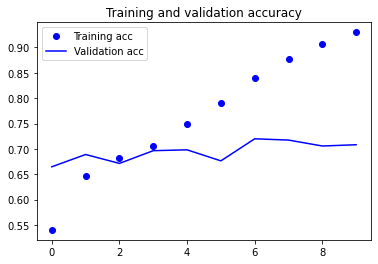

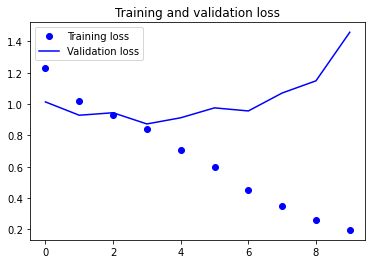

In [37]:
import matplotlib.pyplot as plt
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
test_loss,test_acc=model5.evaluate_generator(test_generator,steps=50)
test_loss, test_acc

(1.5170949697494507, 0.6930000185966492)